# **Credit Card Dataset for Clustering**

Following is the Data Dictionary for Credit Card dataset :-

**CUST_ID** : Identification of Credit Card holder (Categorical)   
**BALANCE : **Balance amount left in their account to make purchases (
**BALANCE_FREQUENCY :** How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

**PURCHASES :** Amount of purchases made from account

**ONEOFF_PURCHASES :** Maximum purchase amount done in one-go

**INSTALLMENTS_PURCHASES :** Amount of purchase done in installment
CASH_ADVANCE : Cash in advance given by the user

**PURCHASES_FREQUENCY :** How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

**ONEOFFPURCHASESFREQUENCY :** How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

**PURCHASESINSTALLMENTSFREQUENCY **: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

**CASHADVANCEFREQUENCY :** How frequently the cash in advance being paid

**CASHADVANCETRX :** Number of Transactions made with "Cash in Advanced"

**PURCHASES_TRX :** Numbe of purchase transactions made

**CREDIT_LIMIT :** Limit of Credit Card for user

**PAYMENTS :** Amount of Payment done by user

**MINIMUM_PAYMENTS **: Minimum amount of payments made by user

**PRCFULLPAYMENT **: Percent of full payment paid by user

**TENURE :** Tenure of credit card service for user

In [ ]:
pip install scikit-learn-intelex


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from __future__ import print_function
import os
data_path = ['data']

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/CC GENERAL.csv")

In [ ]:
data.shape

(8950, 18)

In [ ]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
Data = data.drop(['CUST_ID'], axis=1)

In [ ]:
Data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
Data["MINIMUM_PAYMENTS"].fillna(Data["MINIMUM_PAYMENTS"].mean(), inplace=True)
Data["CREDIT_LIMIT"].fillna(Data["CREDIT_LIMIT"].mean(), inplace=True)
Data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
Data.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [ ]:
for col in Data.columns:
    Data[col] = Data[col].astype(float)

In [ ]:
corr_mat = Data.corr()
for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x] = 0.0 
corr_mat

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,0.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,0.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,0.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,0.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,0.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,0.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,0.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,0.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,0.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,0.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


In [ ]:
corr_mat.abs().idxmax()

BALANCE                                                 CREDIT_LIMIT
BALANCE_FREQUENCY                                            BALANCE
PURCHASES                                           ONEOFF_PURCHASES
ONEOFF_PURCHASES                                           PURCHASES
INSTALLMENTS_PURCHASES                                     PURCHASES
CASH_ADVANCE                                        CASH_ADVANCE_TRX
PURCHASES_FREQUENCY                 PURCHASES_INSTALLMENTS_FREQUENCY
ONEOFF_PURCHASES_FREQUENCY                             PURCHASES_TRX
PURCHASES_INSTALLMENTS_FREQUENCY                 PURCHASES_FREQUENCY
CASH_ADVANCE_FREQUENCY                              CASH_ADVANCE_TRX
CASH_ADVANCE_TRX                              CASH_ADVANCE_FREQUENCY
PURCHASES_TRX                                              PURCHASES
CREDIT_LIMIT                                                 BALANCE
PAYMENTS                                                   PURCHASES
MINIMUM_PAYMENTS                  

In [ ]:
log_columns = Data.skew().sort_values(ascending=False)
log_columns = log_columns.loc[log_columns > 0.75]
log_columns

MINIMUM_PAYMENTS              13.867357
ONEOFF_PURCHASES              10.045083
PURCHASES                      8.144269
INSTALLMENTS_PURCHASES         7.299120
PAYMENTS                       5.907620
CASH_ADVANCE_TRX               5.721298
CASH_ADVANCE                   5.166609
PURCHASES_TRX                  4.630655
BALANCE                        2.393386
PRC_FULL_PAYMENT               1.942820
CASH_ADVANCE_FREQUENCY         1.828686
ONEOFF_PURCHASES_FREQUENCY     1.535613
CREDIT_LIMIT                   1.522549
dtype: float64

In [ ]:
for col in log_columns.index:
    Data[col] = np.log1p(Data[col])

In [ ]:
mms = MinMaxScaler()

for col in Data.columns:
    Data[col] = mms.fit_transform(Data[[col]]).squeeze()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#sns.set_context('notebook')
#sns.set_palette('dark')
#sns.set_style('white')

#sns.pairplot(data);

In [ ]:
pca_list = list()
feature_weight_list = list()

for n in range(1, 16):
    PCAmod = PCA(n_components=n)
    PCAmod.fit(Data)
    pca_list.append(pd.Series({'n':n, 'model':PCAmod, 'var': PCAmod.explained_variance_ratio_.sum()}))
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 'features': Data.columns, 'values':abs_feature_values/abs_feature_values.sum()}))
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.460755
2,PCA(n_components=2),0.620578
3,PCA(n_components=3),0.75184
4,PCA(n_components=4),0.818311
5,PCA(n_components=5),0.866252
6,PCA(n_components=6),0.904161
7,PCA(n_components=7),0.928177
8,PCA(n_components=8),0.943361
9,PCA(n_components=9),0.954753


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
feature_importance = pd.DataFrame([abs_feature_values], columns=Data.columns, index=["feature_importance"]).T

print("-> Feature importance scores", end="\n\n")
feature_importance['feature_importance'].sort_values(ascending=False)

-> Feature importance scores



ONEOFF_PURCHASES                    3.150928
BALANCE                             3.147726
CASH_ADVANCE                        3.104105
ONEOFF_PURCHASES_FREQUENCY          3.011174
BALANCE_FREQUENCY                   2.967331
INSTALLMENTS_PURCHASES              2.961646
PURCHASES_INSTALLMENTS_FREQUENCY    2.887085
PURCHASES_FREQUENCY                 2.879366
CREDIT_LIMIT                        2.811419
PAYMENTS                            2.726681
PURCHASES                           2.689211
MINIMUM_PAYMENTS                    2.602112
PRC_FULL_PAYMENT                    2.400948
CASH_ADVANCE_FREQUENCY              2.247858
TENURE                              2.245254
CASH_ADVANCE_TRX                    2.217562
PURCHASES_TRX                       1.554384
Name: feature_importance, dtype: float64

In [ ]:
pca_list = list()
feature_weight_list = list()

for n in range(1, 16):
    PCAmod = PCA(n_components=n)
    PCAmod.fit(Data)
    pca_list.append(pd.Series({'n':n, 'model':PCAmod, 'var': PCAmod.explained_variance_ratio_.sum()}))
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 'features': Data.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()})) 
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))

[Text(0.5, 0, 'Number of dimensions'),
 Text(0, 0.5, 'Relative importance'),
 Text(0.5, 1.0, 'Feature importance vs Dimensions')]

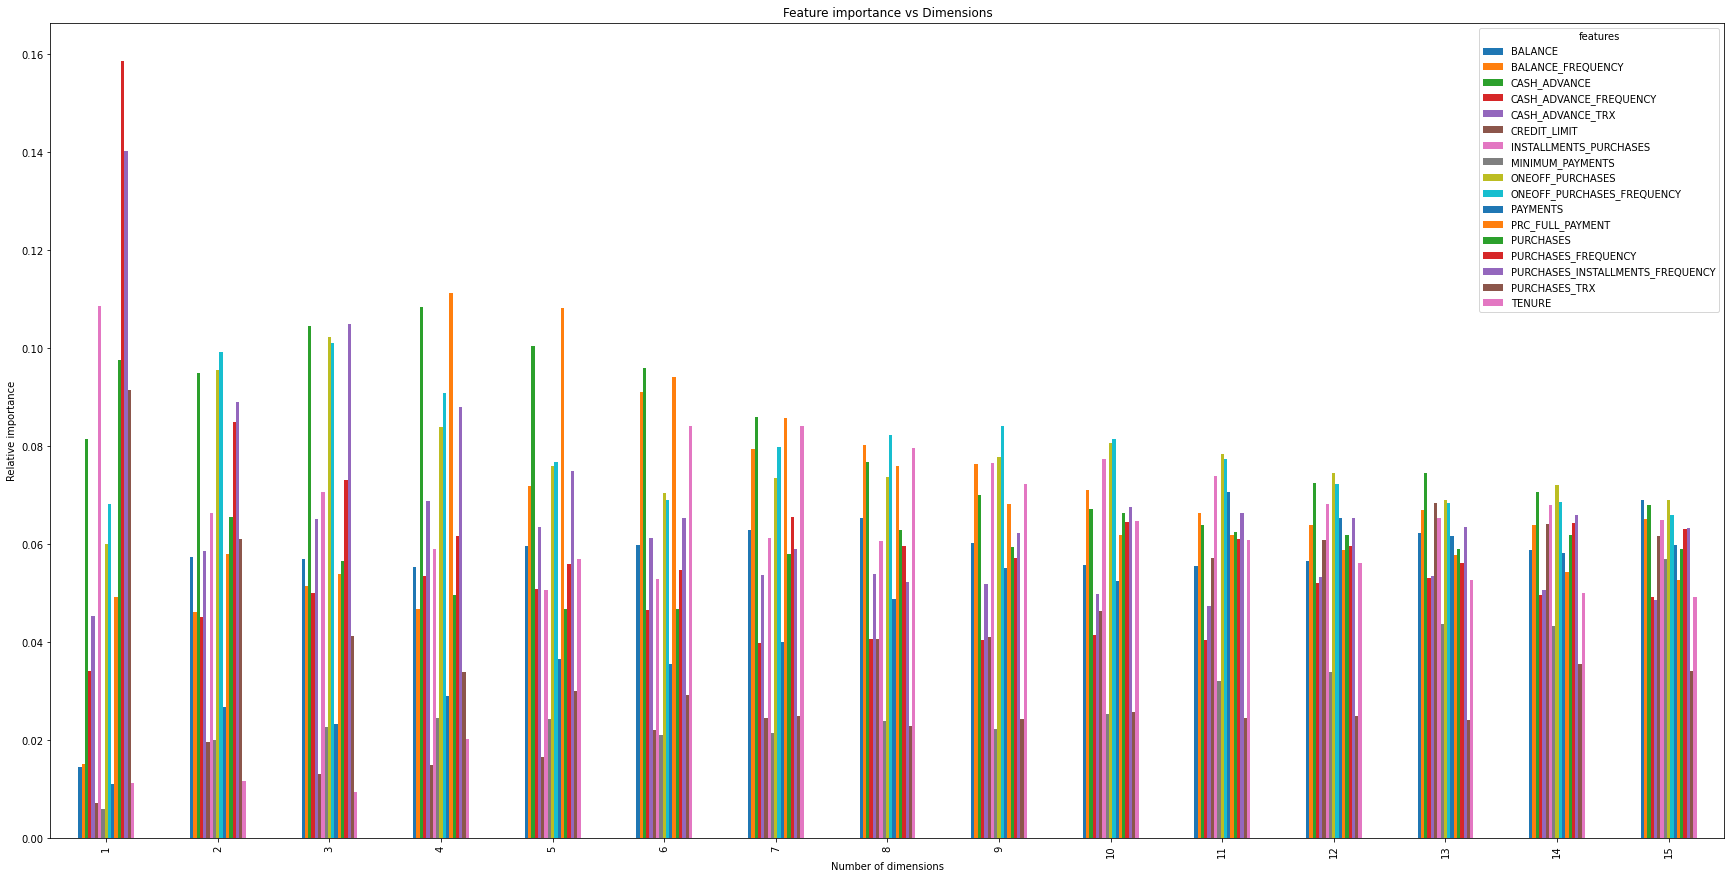

In [ ]:
ax = features_df.plot(kind='bar', figsize=(30, 15))

ax.set(xlabel='Number of dimensions',
       ylabel='Relative importance',
       title='Feature importance vs Dimensions')

In [ ]:
print("data before dimensionality reduction:")
display(Data.head())
n_components = 8
PCAmod = PCA(n_components= n_components)
PCAmod.fit(Data)
PC_data = pd.DataFrame(PCAmod.transform(Data), columns=[f"PC {i}" for i in range(1, n_components+1)])
print("Data after dimensionality reduction:")
display(PC_data.head())

data before dimensionality reduction:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.379045,0.818182,0.422994,0.000000,0.455879,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,0.186733,0.466811,0.490324,0.438874,0.000000,1.0
1,0.819116,0.909091,0.000000,0.000000,0.000000,0.815075,0.000000,0.000000,0.000000,0.243529,0.333889,0.000000,0.771814,0.767919,0.620013,0.289506,1.0
2,0.793799,1.000000,0.615884,0.626611,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.435970,0.782631,0.593925,0.572303,0.000000,1.0
3,0.752871,0.636364,0.677125,0.688918,0.000000,0.495472,0.083333,0.115477,0.000000,0.087355,0.143798,0.117816,0.782631,0.000000,0.600809,0.000000,1.0
4,0.680676,1.000000,0.262325,0.266894,0.000000,0.000000,0.083333,0.115477,0.000000,0.000000,0.000000,0.117816,0.495375,0.601905,0.488693,0.000000,1.0


Data after dimensionality reduction:


,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8
0,-0.312009,-0.536005,-0.195626,-0.315537,0.071733,0.029948,-0.068767,-0.075535
1,-1.030438,0.075053,0.236441,0.309884,0.255224,0.054849,0.006582,0.184501
2,0.391425,0.610733,-0.704260,-0.212215,0.098525,-0.257436,0.438994,0.147616
3,-0.534391,0.204022,-0.429618,-0.210525,-0.219634,0.226092,-0.185426,-0.298165
4,-0.547657,-0.164734,-0.388346,-0.321410,0.281974,-0.194026,-0.028234,-0.045705


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 8)
 
label = kmeans.fit_predict(PC_data)
 
print(label)

[6 3 4 ... 1 3 7]


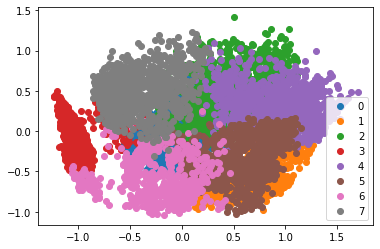

In [ ]:
u_labels = np.unique(label) 
for i in u_labels:
    plt.scatter(PC_data.iloc[label == i , 0] , PC_data.iloc[label == i , 1] , label = i)
plt.legend()
plt.show()